In [3]:
import sys
sys.path.insert(0, '../modules')
from hits import CDCHits, CTHHits, CDCHits, FlatHits
from memory_profiler import memory_usage
from pprint import pprint
from collections import Counter
from root_numpy import list_branches
%load_ext memory_profiler
from tracking import HoughSpace
from scipy import sparse
from tracking import HoughTransformer, HoughShifter
from cylinder import CDC

In [2]:
import root_numpy

In [4]:
# The most common are stored in these notebooks
%run visualizations.ipynb
%run data_tools.ipynb

Populating the interactive namespace from numpy and matplotlib


In [5]:
file_root = "/home/five4three2/development/ICEDUST/"\
            "track-finding-yandex/data/MC4p/"

back_samples = ["MC4p_background_sample_3bunch-train_1.root",
                "MC4p_background_sample_3bunch-train_2.root",
                "MC4p_background_sample_3bunch-train_3.root",
                "MC4p_background_sample_3bunch-train_4.root"]
sig_samples = ["oa_xx_xxx_09010000-0000_xerynzb6emaf_user-TrkTree_000_500signal-label.root",
               "oa_xx_xxx_09110000-0000_2mdcao2ehzya_user-TrkTree_000_500signal-label.root",
               "oa_xx_xxx_09210000-0000_opfmr3awxs2m_user-TrkTree_000_500signal-label.root",
               "oa_xx_xxx_09310000-0000_v62e3u5ppkju_user-TrkTree_000_500signal-label.root"]

sig_samples = [
    "oa_xx_xxx_09010000-0000_xerynzb6emaf_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09110000-0000_2mdcao2ehzya_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09210000-0000_opfmr3awxs2m_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09310000-0000_v62e3u5ppkju_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09410000-0000_z2p5ysva45vx_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09510000-0000_3eox62hw5ygi_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09610000-0000_7ctgq54tptae_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09710000-0000_kah3t5htgouf_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09810000-0000_a4tlhqvqnv4p_user-TrkTree_000_500signal-label.root",
    "oa_xx_xxx_09910000-0000_h6g347twij7d_user-TrkTree_000_500signal-label.root"]

sig_samples_700 = [
    "oa_xx_xxx_09010000-0000_bgd5wd5uhw2n_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09110000-0000_fiey62djp4gd_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09210000-0000_chqno3g2fxqs_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09310000-0000_paynw633hzqk_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09410000-0000_kd234xkjqddc_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09510000-0000_lpd33ym64roi_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09610000-0000_i37ocps322kr_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09710000-0000_t2l7rgghqqdq_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09810000-0000_mzoackf2gbk7_user-TrkTree_000_700signal-label.root",
    "oa_xx_xxx_09910000-0000_cbwuzp2l4inz_user-TrkTree_000_700signal-label.root"]

back_samples = [file_root + this_file for this_file in back_samples]
sig_samples = [file_root + this_file for this_file in sig_samples]

## Import the signal file

In [6]:
sig_hits = data_import_file(, signal=True,
                            use_cuts=these_cuts, branches=branches,
                            empty_branches=empty_branches)

SyntaxError: invalid syntax (<ipython-input-6-5f37cadbaaad>, line 1)

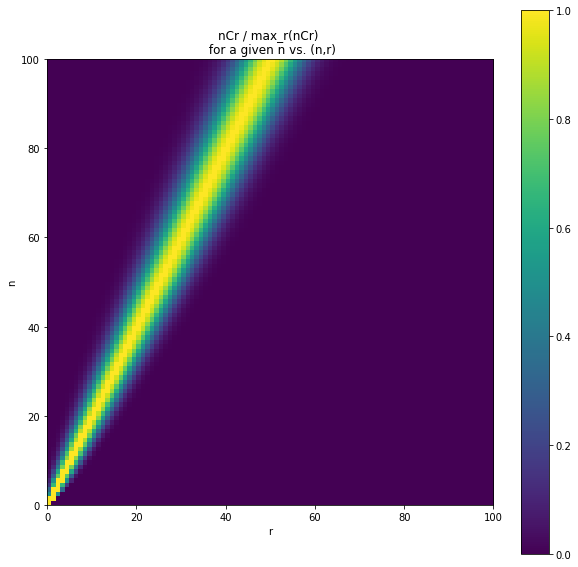

In [104]:
import math
import numpy as np
figsize(10,10)

def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)
nN = 100
an_array = np.zeros((nN, nN))

for n in range(0,nN):
    for r in range(0,n+1):#
        an_array[n,r] = nCr(n,r)
an_array = (an_array.astype(float).T / (np.amax(an_array, axis=1)).astype(float)).T
plt.imshow(an_array, interpolation='nearest', origin='low',
           extent=[0, nN, 0, nN])
plt.colorbar()
plt.title("nCr / max_r(nCr) \n for a given n vs. (n,r)")
plt.xlabel("r")
plt.ylabel("n")
plt.show()